In [1]:
import requests
from config import v_api_key

api_key = v_api_key
base_url = 'https://mc-api.marketcheck.com/v2'

# Function to fetch both new and used car types
def fetch_cars(api_key, car_types=['new', 'used']):
    all_cars = {}

    for car_type in car_types:
        url = f'{base_url}/popular/cars?api_key={api_key}&car_type={car_type}'
        response = requests.get(url)
        all_cars[car_type] = response.json()

    return all_cars
all_cars_data = fetch_cars(api_key, car_types=['new', 'used'])
all_cars_data

{'new': [{'country': 'us',
   'count': 140925,
   'make': 'Toyota',
   'model': 'RAV4',
   'price_stats': {'geometric_mean': 37052,
    'listings_count': 133608,
    'min': 5999,
    'median': 36594,
    'population_standard_deviation': 4737,
    'variance': 22436038,
    'max': 103409,
    'mean': 37337,
    'trimmed_mean': 36916,
    'standard_deviation': 4737,
    'iqr': 5755},
   'miles_stats': {'geometric_mean': 8,
    'listings_count': 52836,
    'min': 1,
    'median': 5,
    'population_standard_deviation': 9684,
    'variance': 93782881,
    'max': 250000,
    'mean': 902,
    'trimmed_mean': 10,
    'standard_deviation': 9684,
    'iqr': 7},
   'dom_stats': {'geometric_mean': 27,
    'listings_count': 0,
    'min': 1,
    'median': 29,
    'population_standard_deviation': 29,
    'variance': 847,
    'max': 1691,
    'mean': 34,
    'trimmed_mean': 30,
    'standard_deviation': 29,
    'iqr': 21}},
  {'country': 'us',
   'count': 98566,
   'make': 'Toyota',
   'model': 'Camry

In [2]:
import pandas as pd

# Assuming 'popular_cars' is a dictionary with keys 'new' and 'used'
new_cars_data = popular_cars.get('new', [])
used_cars_data = popular_cars.get('used', [])

# Combine data for both new and used cars
all_cars_data = new_cars_data + used_cars_data

# Extract relevant information and create a DataFrame
all_cars_df = pd.DataFrame([
    {
        'year': car.get('year', ''),
        'make': car.get('make', ''),
        'model': car.get('model', ''),
        'price': car.get('price_stats', {}).get('mean', 0),
    }
    for car in all_cars_data
])

# Display the DataFrame
all_cars_df

NameError: name 'popular_cars' is not defined

In [31]:
import requests
import pandas as pd
from config import v_api_key

api_key = v_api_key
base_url = 'https://mc-api.marketcheck.com/v2'

def fetch_cars(api_key, car_types=['new', 'used'], price_range=None, year_range=None, miles_range=None, msrp_range=None):
    all_cars_data = {}

    for car_type in car_types:
        url = f'{base_url}/popular/cars?api_key={api_key}&car_type={car_type}'
        
        # Include range filtering parameters if provided
        if price_range:
            url += f'&price_range={price_range}'
        if year_range:
            url += f'&year_range={year_range}'
        if miles_range:
            url += f'&miles_range={miles_range}'
        if msrp_range:
            url += f'&msrp_range={msrp_range}'

        response = requests.get(url)
        all_cars_data[car_type] = response.json()

    return all_cars_data

# Example: Fetch cars for both new and used car types within specified range filters
all_cars_data = fetch_cars(api_key, car_types=['new', 'used'], price_range='15000-30000', year_range='2010-2022', miles_range='0-50000', msrp_range='15000-40000')

# Display the result
all_cars_data

{'new': [{'country': 'us',
   'count': 140925,
   'make': 'Toyota',
   'model': 'RAV4',
   'price_stats': {'geometric_mean': 37052,
    'listings_count': 133608,
    'min': 5999,
    'median': 36594,
    'population_standard_deviation': 4737,
    'variance': 22436038,
    'max': 103409,
    'mean': 37337,
    'trimmed_mean': 36916,
    'standard_deviation': 4737,
    'iqr': 5755},
   'miles_stats': {'geometric_mean': 8,
    'listings_count': 52836,
    'min': 1,
    'median': 5,
    'population_standard_deviation': 9684,
    'variance': 93782881,
    'max': 250000,
    'mean': 902,
    'trimmed_mean': 10,
    'standard_deviation': 9684,
    'iqr': 7},
   'dom_stats': {'geometric_mean': 27,
    'listings_count': 0,
    'min': 1,
    'median': 29,
    'population_standard_deviation': 29,
    'variance': 847,
    'max': 1691,
    'mean': 34,
    'trimmed_mean': 30,
    'standard_deviation': 29,
    'iqr': 21}},
  {'country': 'us',
   'count': 98566,
   'make': 'Toyota',
   'model': 'Camry

In [35]:
import requests
import pandas as pd
from config import v_api_key

api_key = v_api_key
base_url = 'https://mc-api.marketcheck.com/v2'

# Function to fetch both new and used car types
def fetch_cars(api_key, car_types=['new', 'used'], price_range='15000-30000', year_range='2010-2022', miles_range='0-50000', msrp_range='15000-40000'):
    all_cars_data = []

    for car_type in car_types:
        url = f'{base_url}/popular/cars?api_key={api_key}&car_type={car_type}&price_range={price_range}&year_range={year_range}&miles_range={miles_range}&msrp_range={msrp_range}'
        response = requests.get(url)

        try:
            data = response.json()
            print(f"Response for {car_type} cars: {data}")
            if 'popular_cars' in data:
                cars_data = data['popular_cars']
                all_cars_data.extend(cars_data)
            else:
                print(f"Error in API response for {car_type} cars: {data}")
        except Exception as e:
            print(f"Error parsing JSON response for {car_type} cars: {e}")

    return all_cars_data

# Fetch cars data
all_cars_data = fetch_cars(api_key, car_types=['new', 'used'], price_range='15000-30000', year_range='2010-2022', miles_range='0-50000', msrp_range='15000-40000')

# Extract relevant information and create a DataFrame
all_cars_df = pd.DataFrame([
    {
        'car_type': car.get('car_type', ''),
        'year': int(car.get('year_range', '0-0').split('-')[0]),
        'make': car.get('make', ''),
        'model': car.get('model', ''),
        'price': car.get('price_range', {}).get('mean', 0),
        'miles': car.get('miles_range', {}).get('mean', 0),
        'msrp': car.get('msrp_range', {}).get('mean', 0)
    }
    for car in all_cars_data
])

# Display the DataFrame
all_cars_df[['car_type', 'year', 'make', 'model', 'price', 'miles', 'msrp']]

Response for new cars: [{'country': 'us', 'count': 140925, 'make': 'Toyota', 'model': 'RAV4', 'price_stats': {'geometric_mean': 37052, 'listings_count': 133608, 'min': 5999, 'median': 36594, 'population_standard_deviation': 4737, 'variance': 22436038, 'max': 103409, 'mean': 37337, 'trimmed_mean': 36916, 'standard_deviation': 4737, 'iqr': 5755}, 'miles_stats': {'geometric_mean': 8, 'listings_count': 52836, 'min': 1, 'median': 5, 'population_standard_deviation': 9684, 'variance': 93782881, 'max': 250000, 'mean': 902, 'trimmed_mean': 10, 'standard_deviation': 9684, 'iqr': 7}, 'dom_stats': {'geometric_mean': 27, 'listings_count': 0, 'min': 1, 'median': 29, 'population_standard_deviation': 29, 'variance': 847, 'max': 1691, 'mean': 34, 'trimmed_mean': 30, 'standard_deviation': 29, 'iqr': 21}}, {'country': 'us', 'count': 98566, 'make': 'Toyota', 'model': 'Camry', 'price_stats': {'geometric_mean': 32256, 'listings_count': 94355, 'min': 5502, 'median': 31424, 'population_standard_deviation': 39

KeyError: "None of [Index(['car_type', 'year', 'make', 'model', 'price', 'miles', 'msrp'], dtype='object')] are in the [columns]"

In [38]:
import requests
import pandas as pd
from IPython.display import display
from config import v_api_key

api_key = v_api_key
base_url = 'https://mc-api.marketcheck.com/v2'

# Function to fetch both new and used car types
def fetch_cars(api_key, car_types=['new', 'used'], price_range='15000-30000', year_range='2010-2022', miles_range='0-50000', msrp_range='15000-40000'):
    all_cars_data = []

    for car_type in car_types:
        url = f'{base_url}/popular/cars?api_key={api_key}&car_type={car_type}&price_range={price_range}&year_range={year_range}&miles_range={miles_range}&msrp_range={msrp_range}'
        response = requests.get(url)

        try:
            data = response.json()
            if 'popular_cars' in data:
                cars_data = data['popular_cars']
                all_cars_data.extend(cars_data)
            else:
                print(f"Error in API response for {car_type} cars: {data}")
        except Exception as e:
            print(f"Error parsing JSON response for {car_type} cars: {e}")

    return all_cars_data

# Fetch cars data
all_cars_data = fetch_cars(api_key, car_types=['new', 'used'], price_range='15000-30000', year_range='2010-2022', miles_range='0-50000', msrp_range='15000-40000')

# Extract relevant information and create a DataFrame
all_cars_df = pd.DataFrame([
    {
        'car_type': car.get('car_type', ''),
        'year': int(car.get('year_range', '0-0').split('-')[0]),
        'make': car.get('make', ''),
        'model': car.get('model', ''),
        'price': car.get('price_range', {}).get('mean', 0),
        'miles': car.get('miles_range', {}).get('mean', 0),
        'msrp': car.get('msrp_range', {}).get('mean', 0)
    }
    for car in all_cars_data
])

# Display the DataFrame
display(all_cars_df[['car_type', 'year', 'make', 'model', 'price', 'miles', 'msrp']])

Error in API response for new cars: [{'country': 'us', 'count': 140925, 'make': 'Toyota', 'model': 'RAV4', 'price_stats': {'geometric_mean': 37052, 'listings_count': 133608, 'min': 5999, 'median': 36594, 'population_standard_deviation': 4737, 'variance': 22436038, 'max': 103409, 'mean': 37337, 'trimmed_mean': 36916, 'standard_deviation': 4737, 'iqr': 5755}, 'miles_stats': {'geometric_mean': 8, 'listings_count': 52836, 'min': 1, 'median': 5, 'population_standard_deviation': 9684, 'variance': 93782881, 'max': 250000, 'mean': 902, 'trimmed_mean': 10, 'standard_deviation': 9684, 'iqr': 7}, 'dom_stats': {'geometric_mean': 27, 'listings_count': 0, 'min': 1, 'median': 29, 'population_standard_deviation': 29, 'variance': 847, 'max': 1691, 'mean': 34, 'trimmed_mean': 30, 'standard_deviation': 29, 'iqr': 21}}, {'country': 'us', 'count': 98566, 'make': 'Toyota', 'model': 'Camry', 'price_stats': {'geometric_mean': 32256, 'listings_count': 94355, 'min': 5502, 'median': 31424, 'population_standard_d

KeyError: "None of [Index(['car_type', 'year', 'make', 'model', 'price', 'miles', 'msrp'], dtype='object')] are in the [columns]"

In [2]:
import pandas as pd
import random

# Define lists of possible values for makes, models, and years
makes = ['Toyota', 'Honda', 'Ford', 'Chevrolet', 'Nissan']
models = ['Camry', 'Civic', 'Fusion', 'Malibu', 'Altima']
years = list(range(2015, 2023))  # Assuming years from 2015 to 2022

# Generate random data for a DataFrame
num_entries = 1000  # You can adjust the number of entries as needed
random_data = [
    {
        'make': random.choice(makes),
        'model': random.choice(models),
        'year': random.choice(years),
        'price': random.randint(15000, 35000),
        'mileage': random.randint(10000, 80000)
    }
    for _ in range(num_entries)
]

# Create a DataFrame
df = pd.DataFrame(random_data)

# Display the DataFrame
print(df)

          make   model  year  price  mileage
0    Chevrolet  Fusion  2016  34258    19567
1        Honda  Altima  2017  31685    27821
2       Nissan  Malibu  2018  21458    14039
3        Honda   Civic  2015  20524    61683
4    Chevrolet  Altima  2016  29905    58131
..         ...     ...   ...    ...      ...
995       Ford   Camry  2016  34667    62863
996     Nissan   Civic  2021  22242    75927
997     Toyota   Civic  2015  19745    76915
998  Chevrolet   Civic  2020  15895    31798
999       Ford   Camry  2021  16613    53144

[1000 rows x 5 columns]


In [7]:
import requests
import pandas as pd

from config import v_api_key

api_key = v_api_key
base_url = 'https://mc-api.marketcheck.com/v2'

def fetch_cars(api_key, car_type='used', make='Toyota', model='Camry', year='2018'):
    url = f'{base_url}/search?api_key={api_key}&car_type={car_type}&make={make}&model={model}&year={year}'
    response = requests.get(url)

    try:
        data = response.json()
        if 'listings' in data:
            return data['listings']
        else:
            print(f"Error in API response: {data}")
    except Exception as e:
        print(f"Error parsing JSON response: {e}")

    return []

# Fetch car data
car_listings = fetch_cars(api_key, car_type='used', make='Toyota', model='Camry', year='2018')

# Convert data to DataFrame
df = pd.DataFrame(car_listings)

# Display the DataFrame
print(df.head())

Error in API response: {'message': 'no Route matched with those values'}
Empty DataFrame
Columns: []
Index: []


In [8]:
import requests

# Replace 'YOUR_API_KEY' with your actual API key
from config import v_api_key

api_key = v_api_key
base_url = 'https://mc-api.marketcheck.com/v2'

# Example request to get active car listings
url = f'{base_url}/search/car/active'
headers = {'Authorization': f'Bearer {api_key}'}

response = requests.get(url, headers=headers)

# Process the response (e.g., convert to JSON or check for errors)
data = response.json()
print(data)

{'message': 'Invalid authentication credentials'}


In [9]:
import requests

# Replace 'YOUR_API_KEY' with your actual API key
api_key = "56d3d499-0064-42f8-8072-d2ac179e9e4d"

# Define the URL with parameters
url = f'https://mc-api.marketcheck.com/v2/search/car/active?api_key={api_key}&year=2015&make=ford&include_relevant_links=true'

# Make the GET request
response = requests.get(url)

# Process the response (e.g., convert to JSON or check for errors)
data = response.json()

# Display the data
print(data)

{'num_found': 19138, 'listings': [{'id': '1FTBF2BTXFED34879-deb80d76-d3d9', 'vin': '1FTBF2BTXFED34879', 'heading': '2015 Ford F-250 Super Duty XLT', 'price': 26990, 'miles': 96410, 'msrp': 26990, 'data_source': 'mc', 'vdp_url': 'https://www.autoproautosalesme.com/details/used-2015-ford-f-250-super-duty/97384032', 'carfax_1_owner': False, 'carfax_clean_title': False, 'exterior_color': 'Silver', 'interior_color': 'Gray', 'base_int_color': 'Gray', 'base_ext_color': 'Silver', 'dom': 400, 'dom_180': 143, 'dom_active': 143, 'seller_type': 'dealer', 'inventory_type': 'used', 'stock_no': 'S150411', 'last_seen_at': 1707359547, 'last_seen_at_date': '2024-02-08T02:32:27.000Z', 'scraped_at': 1707186915, 'scraped_at_date': '2024-02-06T02:35:15.000Z', 'first_seen_at': 1707186915, 'first_seen_at_date': '2024-02-06T02:35:15.000Z', 'first_seen_at_source': 1696263594, 'first_seen_at_source_date': '2023-10-02T16:19:54.000Z', 'first_seen_at_mc': 1447599872, 'first_seen_at_mc_date': '2015-11-15T15:04:32.00

In [11]:
import requests
import pandas as pd
api_key = "56d3d499-0064-42f8-8072-d2ac179e9e4d"

def fetch_cars(api_key, year, make, car_type=None):
    base_url = 'https://mc-api.marketcheck.com/v2/search/car/active'
    
    # Ensure year is a valid integer between 1981 and 2024
    try:
        year = int(year)
        if year < 1981 or year > 2024:
            raise ValueError("Year must be between 1981 and 2024.")
    except ValueError:
        raise ValueError("Year must be a valid integer.")

    # Normalize make to proper case
    make = make.capitalize()

    # Define parameters
    params = {
        'api_key': api_key,
        'year': year,
        'make': make,
    }

    # Add car_type parameter if provided
    if car_type:
        params['car_type'] = car_type.lower()

    # Make the GET request
    response = requests.get(base_url, params=params)

    try:
        data = response.json()
        if 'listings' in data:
            return data['listings']
        else:
            print(f"Error in API response: {data}")
    except Exception as e:
        print(f"Error parsing JSON response: {e}")

    return []

# Replace 'YOUR_API_KEY' with your actual API key
api_key = 'YOUR_API_KEY'
year = 2020
make = 'Toyota'

# Fetch car data
car_listings = fetch_cars(api_key, year, make)

# Convert data to DataFrame
df = pd.DataFrame(car_listings)

# Display the DataFrame
print(df.head())

Error in API response: {'message': 'Invalid authentication credentials'}
Empty DataFrame
Columns: []
Index: []


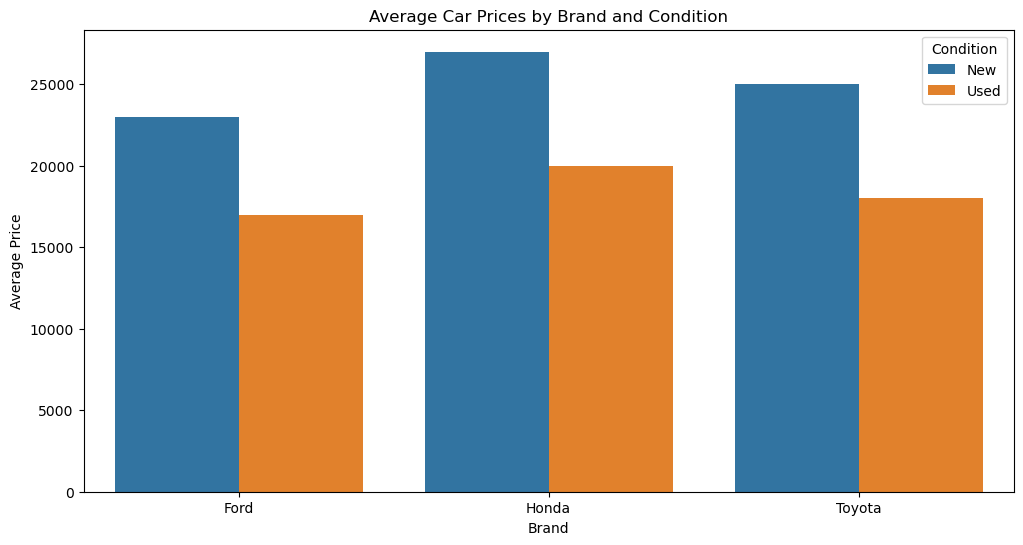

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (replace this with your actual dataset)
data = {
    'year': [2022, 2023, 2022, 2020, 2019, 2020],
    'make': ['Toyota', 'Honda', 'Ford', 'Toyota', 'Honda', 'Ford'],
    'condition': ['New', 'New', 'New', 'Used', 'Used', 'Used'],
    'price': [25000, 27000, 23000, 18000, 20000, 17000]
}

df = pd.DataFrame(data)

# Calculate average price per brand and condition
avg_price_df = df.groupby(['make', 'condition'], as_index=False)['price'].mean()

# Data visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='make', y='price', hue='condition', data=avg_price_df)
plt.title('Average Car Prices by Brand and Condition')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.legend(title='Condition')
plt.show()


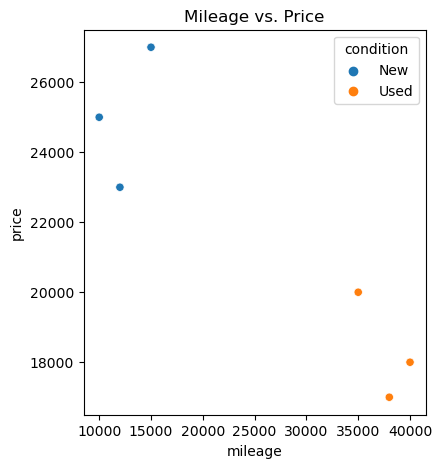

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (replace this with your actual dataset)
data = {
    'make': ['Toyota', 'Honda', 'Ford', 'Toyota', 'Honda', 'Ford'],
    'model': ['Camry', 'Civic', 'Fusion', 'Camry', 'Civic', 'Fusion'],
    'year': [2022, 2023, 2022, 2020, 2019, 2020],
    'condition': ['New', 'New', 'New', 'Used', 'Used', 'Used'],
    'mileage': [10000, 15000, 12000, 40000, 35000, 38000],
    'price': [25000, 27000, 23000, 18000, 20000, 17000]
}

df = pd.DataFrame(data)

# Data visualization
plt.figure(figsize=(15, 5))

# Plot 1: Mileage vs. Price
plt.subplot(1, 3, 1)
sns.scatterplot(x='mileage', y='price', hue='condition', data=df)
plt.title('Mileage vs. Price')
plt.show()

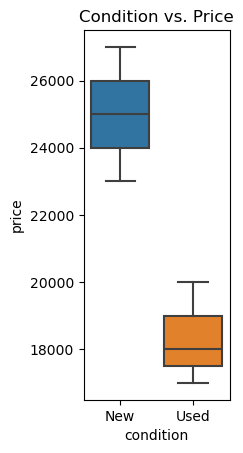

In [24]:

# Plot 2: Condition vs. Price
plt.subplot(1, 3, 2)
sns.boxplot(x='condition', y='price', data=df)
plt.title('Condition vs. Price')
plt.show()


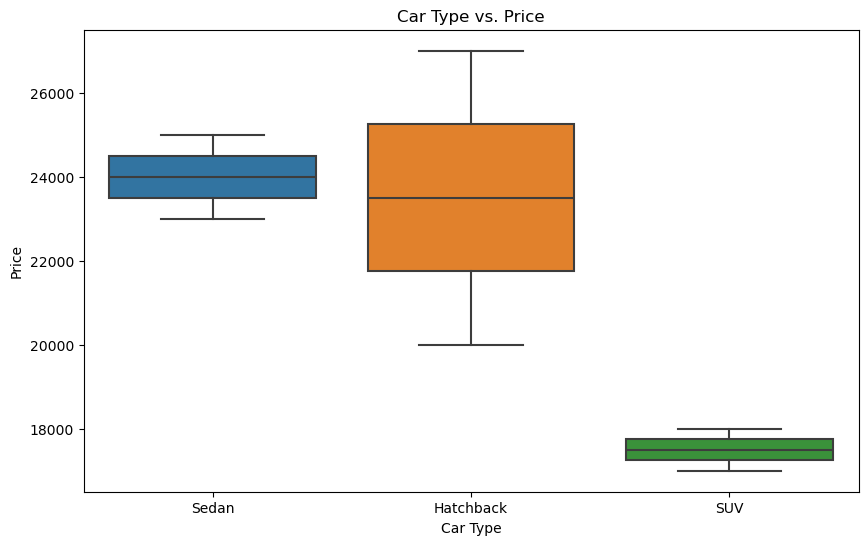

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (replace this with your actual dataset)
data = {
    'make': ['Toyota', 'Honda', 'Ford', 'Toyota', 'Honda', 'Ford'],
    'model': ['Camry', 'Civic', 'Fusion', 'Camry', 'Civic', 'Fusion'],
    'year': [2022, 2023, 2022, 2020, 2019, 2020],
    'condition': ['New', 'New', 'New', 'Used', 'Used', 'Used'],
    'mileage': [10000, 15000, 12000, 40000, 35000, 38000],
    'type': ['Sedan', 'Hatchback', 'Sedan', 'SUV', 'Hatchback', 'SUV'],
    'price': [25000, 27000, 23000, 18000, 20000, 17000]
}

df = pd.DataFrame(data)

# Data visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='price', data=df)
plt.title('Car Type vs. Price')
plt.xlabel('Car Type')
plt.ylabel('Price')
plt.show()